In [11]:
! pip install pandas numpy scikit-learn seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [3]:
bank = pd.read_csv(r"mat_csv/bank-full.csv",sep=";")
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# bank_df = bank.replace({'yes': 1, 'no': 0},inplace=True)

In [8]:
bank.y.replace(("yes","no"),(1,0),inplace=True)
bank.default.replace(("yes","no"),(1,0),inplace=True)
bank.housing.replace(("yes","no"),(1,0),inplace=True)
bank.loan.replace(("yes","no"),(1,0),inplace=True)

C:\Users\mukes\AppData\Local\Temp\ipykernel_4192\2495580320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank.y.replace(("yes","no"),(1,0),inplace=True)
C:\Users\mukes\AppData\Local\Temp\ipykernel_4192\2495580320.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank.y.replace(("yes","no"),

In [9]:
bank = pd.get_dummies(bank)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  bool 
 12  job_blue-collar      45211 non-null  bool 
 13  job_entrepreneur     45211 non-null  bool 
 14  job_housemaid        45211 non-null  bool 
 15  job_management       45211 non-null  bool 
 16  job_retired          4

In [11]:
# Move the 'y' column to the end of the dataframe
bank = bank[[col for col in bank.columns if col != 'y'] + ['y']]
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,0,2143,1,0,5,261,1,-1,0,...,False,True,False,False,False,False,False,False,True,0
1,44,0,29,1,0,5,151,1,-1,0,...,False,True,False,False,False,False,False,False,True,0
2,33,0,2,1,1,5,76,1,-1,0,...,False,True,False,False,False,False,False,False,True,0
3,47,0,1506,1,0,5,92,1,-1,0,...,False,True,False,False,False,False,False,False,True,0
4,33,0,1,0,0,5,198,1,-1,0,...,False,True,False,False,False,False,False,False,True,0


In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  job_admin.           45211 non-null  bool 
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

In [15]:
bank.iloc[:2,48].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2 entries, 0 to 1
Series name: y
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 148.0 bytes


In [60]:
X = bank.iloc[:,0:48]
Y = bank.iloc[:,48]

In [61]:
classifier = LogisticRegression()
classifier.fit(X,Y)

c:\Users\mukes\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = classifier.predict(X)

In [63]:
y_pred_df = pd.DataFrame({'actual': Y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})

In [64]:
y_pred_df[20:80]

,actual,predicted
20,0,0
21,0,0
22,0,0
23,0,0
24,0,0
25,0,0
26,0,0
27,0,0
28,0,0
29,0,0


In [71]:
y_pred_df['correct'].mean()

np.float64(0.8917298887438898)

In [72]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39153   769]
 [ 4126  1163]]


In [73]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

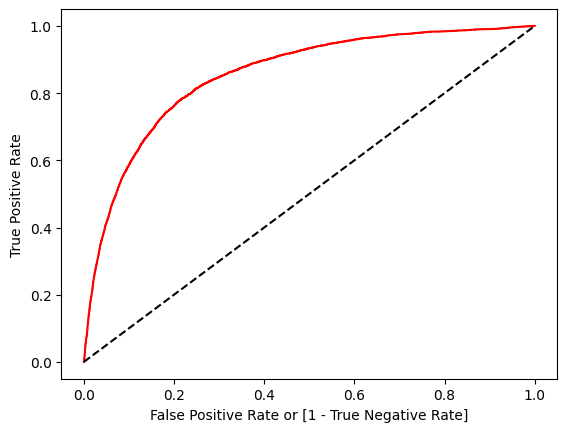

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [78]:
thresholds

array([           inf, 9.99999831e-01, 9.99986249e-01, ...,
       6.29908119e-07, 6.20656077e-07, 3.25153556e-18], shape=(7175,))

In [79]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98121337e-01, 9.98121337e-01, 1.00000000e+00], shape=(7175,))

In [80]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ], shape=(7175,))

In [81]:
auc

np.float64(0.600313888221188)